In [1]:
import ROOT

import os


from my_utils import *
from matplotlib import pyplot as plt
import numpy as np

data_dir = make_data_dir()

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,400)


Welcome to JupyROOT 6.14/04


In [2]:
clear_data_dir()

In [3]:
root_file_name = "joint_tree_prev5000.root"
#root_file_name = "joint_tree_prev1000.root"
#root_file_name = "joint_tree.root"

id="id951"

#varname = "MICRO"
varname = "PHI"
#varname = "X"
#varname  = "THR"

file_list = os.popen('  find /workdir/data -iname "*{:s}" | grep {:s} | sort '.format(
    root_file_name,id)).read().split("\n")

#print("len: {:d}".format(len(file_list)))
#file_list = file_list[0:60]
file_list

['/workdir/data/2019-11-09_12-41-44_id951_R300_HV1750V_thr15_60s_x78.500_phi-4.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-09_12-43-00_id951_R300_HV1750V_thr15_60s_x78.500_phi-3.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-09_12-44-17_id951_R300_HV1750V_thr15_60s_x78.500_phi-2.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-09_12-45-33_id951_R300_HV1750V_thr15_60s_x78.500_phi-1.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-09_12-48-04_id951_R300_HV1750V_thr15_60s_x78.500_phi0.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-09_12-49-20_id951_R300_HV1750V_thr15_60s_x78.500_phi1.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-09_12-50-37_id951_R300_HV1750V_thr15_60s_x78.500_phi2.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-09_12-51-52_id951_R300_HV1750V_thr15_60s_x78.500_phi3.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-09_12-53-09_id951_R300_HV1750V_thr15_60s_x78.500_phi4.00/joint_tree_prev5000.root',
 '']

In [4]:
import re

X =  []
PHI =  []
THR = []
MICRO = []

print ("X")

pattern =  re.compile(".*_x([0-9E+\-.]+).*/{:s}".format(root_file_name))
for file in file_list:
  #print(file , end="   x: ")
  match = re.search(pattern, file)
  if match:
    x = match.groups()[0]
    X += [float(x)]

print (X)

X
[78.5, 78.5, 78.5, 78.5, 78.5, 78.5, 78.5, 78.5, 78.5]


In [5]:
print ("PHI")

pattern =  re.compile(".*_phi([0-9E+\-.]+).*/{:s}".format(root_file_name))
for file in file_list:
  #print(file , end="   x: ")
  match = re.search(pattern, file)
  if match:
    phi = match.groups()[0]
    PHI += [float(phi)]

print (PHI)

PHI
[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


In [6]:
print ("THR")

pattern =  re.compile(".*_thr([0-9E+\-.]+).*/{:s}".format(root_file_name))
for file in file_list:
  #print(file , end="   x: ")
  match = re.search(pattern, file)
  if match:
    thr = match.groups()[0]
    THR += [float(thr)]

print (THR)

THR
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]


In [7]:
print ("MICRO")

pattern =  re.compile(".*_micro([0-9E+\-.]+).*/{:s}".format(root_file_name))
for file in file_list:
  #print(file , end="   x: ")
  match = re.search(pattern, file)
  if match:
    micro = match.groups()[0]
    MICRO += [float(micro)]

print (MICRO)

MICRO
[]


In [8]:
#def extract_info(file):

c = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)

const_list = []
mean_list = []
sigma_list = []
entries_list = []

fish_const_list = []
fish_mean_list = []
fish_sigma_list = []
fish_entries_list = []

const_list_scut = []
mean_list_scut = []
sigma_list_scut = []
entries_list_scut = []

const_list_scut_b = []
mean_list_scut_b = []
sigma_list_scut_b = []
entries_list_scut_b = []

fish_const_list_scut = []
fish_mean_list_scut = []
fish_sigma_list_scut = []
fish_entries_list_scut = []

VAR = X

if varname == "X":
  VAR = X
if varname == "THR":
  VAR = THR
if varname == "PHI":
  VAR = PHI
if varname == "MICRO":
  VAR = MICRO

for i in range(0,len(VAR)):
    
  file=file_list[i]
  var = VAR[i]

##################################################
##                    vw ana                    ##
##################################################


  f = ROOT.TFile(file)
  tree = f.Get("joint_tree")
  #tree.Draw("tot:t1 >> potato(500,0,500e-9,500,0,500e-9)",
  #          "wire == 10 && layer == 1 && chamber == 2",
  #          "colz")

  ### triggers for normalization
  tree.Draw("t1 >> t1(200,-200,800)",
            "chan == 35103",
            "colz")
  t1 = f.Get("t1")
  no_triggers = t1.GetEntries()

  print ("var: {:3.3f} {:s}, no_triggers: {:d}".format(var,varname,int(no_triggers)))
  

  ### t1 of desired wire, wide
  tree.Draw("t1 >> t1(1000,-200,800)",
            "chamber == 2 && layer == 1 && wire == 10",
            "colz")
  c.SaveAs("{:s}/{:3.3f}_t1_wide.png".format(data_dir,var))

  ### t1 of desired wire
  tree.Draw("t1 >> t1(200,-50,100)",
            "chamber == 2 && layer == 1 && wire == 10",
            "colz")
  t1 = f.Get("t1")
  #t1.SetTitle("t1 wire 10, layer 1")
  t1.GetXaxis().SetTitle("t1 (ns)")
  t1.GetYaxis().SetTitle("tot (s)")
  #t1.GetXaxis().SetRangeUser()
  t1.Draw()
  t1.Fit("gaus","")
  t1.Fit("gaus","WW")
    

  fit = t1.GetFunction("gaus");

  try:
    const_list   += [fit.GetParameter(0)/no_triggers]
    mean_list    += [fit.GetParameter(1)]
    sigma_list   += [fit.GetParameter(2)]
    entries_list += [(t1.Integral(t1.FindBin(0),t1.FindBin(80)))/no_triggers]   
  except:
    const_list   += [0]
    mean_list    += [0]
    sigma_list   += [0]
    entries_list += [0]
    
  c.SaveAs("{:s}/{:3.3f}_t1.png".format(data_dir,var))
  f.Close()
    
    
    
##################################################
##                   fish ana                   ##
##################################################
    
    
    
  f = ROOT.TFile(file.replace("joint_tree","correlation"))

  fish = f.Get("meta_fish_cut")
  fish.Draw("colz")
  c.SaveAs("{:s}/{:3.3f}_fish.png".format(data_dir,var))
  fish_proj_full= fish.ProjectionX("fish_proj_full", 1, 120) # 

  fish_proj= fish.ProjectionX("fish_proj", 61, 65) # -10/+10
  fish_proj.Draw()


  t1 = fish_proj
  #t1.SetTitle("t1 wire 10, layer 1")
  t1.GetXaxis().SetTitle("t1 (ns)")
  t1.GetYaxis().SetTitle("tot (s)")
  #t1.GetXaxis().SetRangeUser()
  t1.Draw()
  t1.Fit("gaus","")
  t1.Fit("gaus","WW")
  ROOT.gStyle.SetOptFit(1)
  t1.Draw()  
  c.SaveAs("{:s}/{:3.3f}_fish_proj.png".format(data_dir,var))

  fit = t1.GetFunction("gaus");

  try:
    fish_const_list   += [fit.GetParameter(0)/no_triggers]
    fish_mean_list    += [fit.GetParameter(1)]
    fish_sigma_list   += [fit.GetParameter(2)]
    fish_entries_list += [(fish_proj_full.Integral(fish_proj_full.FindBin(0),fish_proj_full.FindBin(80)))/no_triggers]   
  except:
    fish_const_list   += [0]
    fish_mean_list    += [0]
    fish_sigma_list   += [0]
    fish_entries_list += [0]

##################################################
##                scinti_cut ana                ##
##################################################
  no_triggers = 1
  try:
    # number of triggers for normalization
    no_triggers = 1
    t1 = f.Get("scinti_t1_scinti_cut")
    no_triggers = t1.GetEntries()
    print ("var: {:3.3f} {:s}, scinti_cut no_triggers: {:d}".format(var,varname,int(no_triggers)))

    ### t1 of desired wire
    t1 = f.Get("wire_a_t1_scinti_cut")
    #t1.SetTitle("t1 wire 10, layer 1")
    t1.GetXaxis().SetTitle("t1 (ns)")
    t1.GetYaxis().SetTitle("tot (s)")
    #t1.GetXaxis().SetRangeUser()
    t1.Draw()
    t1.Fit("gaus","")
    t1.Fit("gaus","WW")
      
    fit = t1.GetFunction("gaus");
    
    

    const_list_scut   += [fit.GetParameter(0)/no_triggers]
    mean_list_scut    += [fit.GetParameter(1)]
    sigma_list_scut   += [fit.GetParameter(2)]
    entries_list_scut += [(t1.Integral(t1.FindBin(0),t1.FindBin(80)))/no_triggers]   
    
    c.SaveAs("{:s}/{:3.3f}_t1_scut.png".format(data_dir,var))
    
    ### t1 of desired wire
    t1 = f.Get("wire_b_t1_scinti_cut")
    #t1.SetTitle("t1 wire 10, layer 1")
    t1.GetXaxis().SetTitle("t1 (ns)")
    t1.GetYaxis().SetTitle("tot (s)")
    #t1.GetXaxis().SetRangeUser()
    t1.Draw()
    t1.Fit("gaus","")
    t1.Fit("gaus","WW")
      
    fit = t1.GetFunction("gaus");
    
    

    const_list_scut_b   += [fit.GetParameter(0)/no_triggers]
    mean_list_scut_b    += [fit.GetParameter(1)]
    sigma_list_scut_b   += [fit.GetParameter(2)]
    entries_list_scut_b += [(t1.Integral(t1.FindBin(0),t1.FindBin(80)))/no_triggers]   
    c.SaveAs("{:s}/{:3.3f}_t1_scut_b.png".format(data_dir,var))
  except:
    const_list_scut   += [0]
    mean_list_scut    += [0]
    sigma_list_scut   += [0]
    entries_list_scut += [0]
    const_list_scut_b   += [0]
    mean_list_scut_b    += [0]
    sigma_list_scut_b   += [0]
    entries_list_scut_b += [0]
    

##################################################
##                scinti_cut fish ana                ##
##################################################


  try:
    fish = f.Get("meta_fish_scinti_cut")
    fish.Draw("colz")
    c.SaveAs("{:s}/{:3.3f}_fish_scinti_cut.png".format(data_dir,var))
  
    fish_proj_full= fish.ProjectionX("fish_proj_full", 1, 120) # 
    fish_proj= fish.ProjectionX("fish_proj", 61, 65) # -10/+10
    fish_proj.Draw()
  
  
    t1 = fish_proj
    #t1.SetTitle("t1 wire 10, layer 1")
    t1.GetXaxis().SetTitle("t1 (ns)")
    t1.GetYaxis().SetTitle("tot (s)")
    #t1.GetXaxis().SetRangeUser()
    t1.Draw()
    t1.Fit("gaus","")
    t1.Fit("gaus","WW")
    ROOT.gStyle.SetOptFit(1)
    t1.Draw()  
    c.SaveAs("{:s}/{:3.3f}_fish_proj_scinti_cut.png".format(data_dir,var))
  
    fit = t1.GetFunction("gaus");

    fish_const_list_scut   += [fit.GetParameter(0)/no_triggers]
    fish_mean_list_scut    += [fit.GetParameter(1)]
    fish_sigma_list_scut   += [fit.GetParameter(2)]
    fish_entries_list_scut += [(fish_proj_full.Integral(fish_proj_full.FindBin(0),fish_proj_full.FindBin(80)))/no_triggers]   
  except:
    fish_const_list_scut   += [0]
    fish_mean_list_scut    += [0]
    fish_sigma_list_scut   += [0]
    fish_entries_list_scut += [0]

  f.Close()




var: -4.000 PHI, no_triggers: 697
var: -4.000 PHI, scinti_cut no_triggers: 565
var: -3.000 PHI, no_triggers: 601
var: -3.000 PHI, scinti_cut no_triggers: 511
var: -2.000 PHI, no_triggers: 606
var: -2.000 PHI, scinti_cut no_triggers: 498
var: -1.000 PHI, no_triggers: 473
var: -1.000 PHI, scinti_cut no_triggers: 391
var: 0.000 PHI, no_triggers: 665
var: 0.000 PHI, scinti_cut no_triggers: 535
var: 1.000 PHI, no_triggers: 609
var: 1.000 PHI, scinti_cut no_triggers: 488
var: 2.000 PHI, no_triggers: 515
var: 2.000 PHI, scinti_cut no_triggers: 439
var: 3.000 PHI, no_triggers: 566
var: 3.000 PHI, scinti_cut no_triggers: 468
var: 4.000 PHI, no_triggers: 506
var: 4.000 PHI, scinti_cut no_triggers: 420
 FCN=102.079 FROM MIGRAD    STATUS=CONVERGED      95 CALLS          96 TOTAL
                     EDM=1.46323e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE   

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName
Warning in <TClass::Init>: no dictionary for class Event is available
Warning in <TClass::Init>: no dictionary for class Hit is available
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/-4.000_t1_wide.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/-4.000_t1.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/-4.000_fish.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/-4.000_fish_proj.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/-4.000_t1_scut.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/-4.000_t1_scut_b.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/-4.

In [9]:
len(entries_list_scut)

9

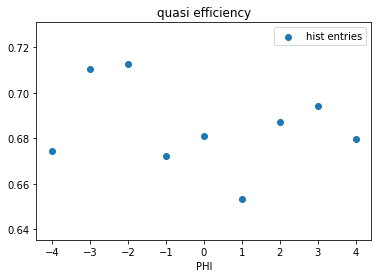

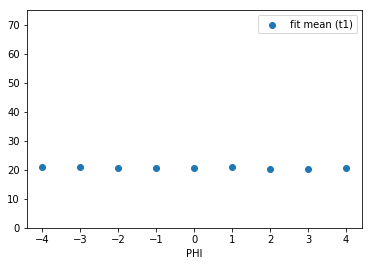

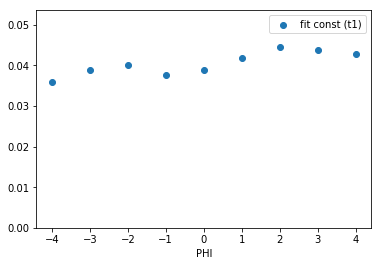

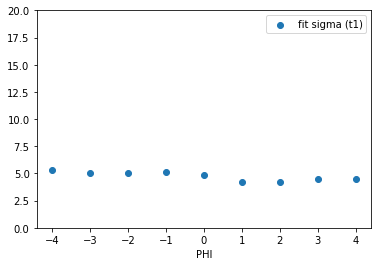

In [10]:
VAR = VAR[0:len(entries_list)]

##################################################
##                    vw ana                    ##
##################################################


plt.scatter(VAR,entries_list,label="hist entries")
#plt.plot(VAR,entries_list,label="hist entries")
#plt.ylim(0,np.max(entries_list)*1.2)
plt.legend()
plt.xlabel(varname)
plt.title("quasi efficiency")
plt.show()

plt.scatter(VAR,mean_list,label="fit mean (t1)")
#plt.plot(VAR,mean_list,label="fit mean (t1)")
#plt.ylim(0,np.max(mean_list)*1.2)
plt.legend()
plt.xlabel(varname)
plt.ylim(0,75)
plt.show()

plt.scatter(VAR,const_list,label="fit const (t1)")
#plt.plot(VAR,const_list,label="fit const (t1)")
plt.ylim(0,np.max(const_list)*1.2)
plt.legend()
plt.xlabel(varname)
#plt.ylim(0,0.3)
plt.show()

plt.scatter(VAR,sigma_list,label="fit sigma (t1)")

#plt.plot(VAR,sigma_list,label="fit sigma (t1)")
#plt.ylim(0,np.max(sigma_list)*1.2)
plt.ylim(0,20)
plt.legend()
plt.xlabel(varname)
plt.show()

#area_list = np.array(const_list) * np.array(sigma_list)

#plt.scatter(VAR,area_list,label="gaus area")
#plt.ylim(0,np.max(area_list))
#plt.legend()
#plt.ylim(0,5)
#plt.show()

saving to /workdir/jupyter/offline_quick_ana_combi_data/000.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/000.pickle


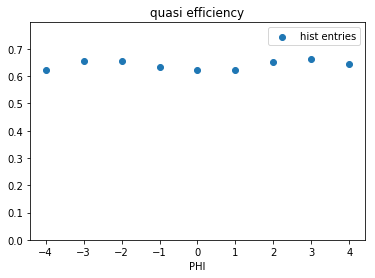

saving to /workdir/jupyter/offline_quick_ana_combi_data/001.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/001.pickle


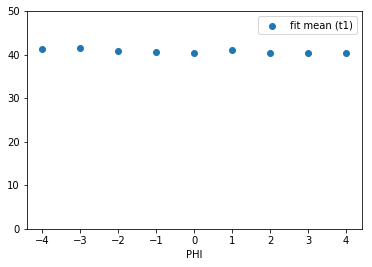

saving to /workdir/jupyter/offline_quick_ana_combi_data/002.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/002.pickle


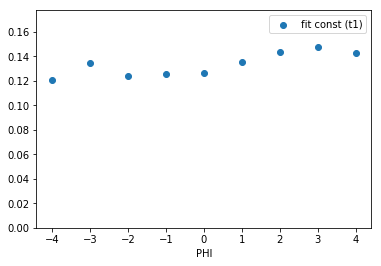

saving to /workdir/jupyter/offline_quick_ana_combi_data/003.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/003.pickle


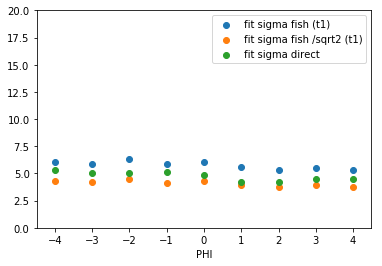

In [11]:
##################################################
##                   fish ana                   ##
##################################################


plt.scatter(VAR,fish_entries_list,label="hist entries")
#plt.plot(VAR,fish_entries_list,label="hist entries")
plt.ylim(0,np.max(fish_entries_list)*1.2)
plt.legend()
plt.title("quasi efficiency")
plt.xlabel(varname)
show(plt)

plt.scatter(VAR,fish_mean_list,label="fit mean (t1)")
#plt.plot(VAR,fish_mean_list,label="fit mean (t1)")
plt.ylim(0,np.max(fish_mean_list)*1.2)
plt.legend()
#plt.ylim(0,75)
plt.xlabel(varname)
show(plt)

plt.scatter(VAR,fish_const_list,label="fit const (t1)")
#plt.plot(VAR,fish_const_list,label="fit const (t1)")
plt.ylim(0,np.max(fish_const_list)*1.2)
plt.legend()
#plt.ylim(0,0.3)
plt.xlabel(varname)
show(plt)

plt.scatter(VAR,fish_sigma_list,label="fit sigma fish (t1)")
plt.scatter(VAR,np.array(fish_sigma_list)/np.sqrt(2),label="fit sigma fish /sqrt2 (t1)")
plt.scatter(VAR,sigma_list,label="fit sigma direct")
#plt.plot(VAR,fish_sigma_list,label="fit sigma (t1)")
plt.ylim(0,np.max(fish_sigma_list)*1.2)
plt.ylim(0,20)
plt.legend()
plt.xlabel(varname)
show(plt)



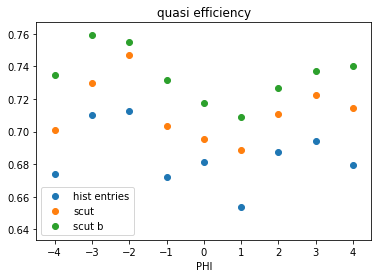

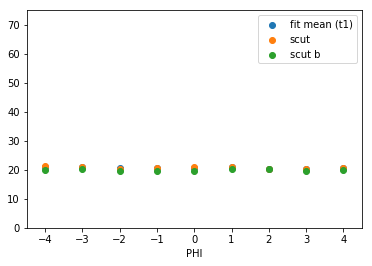

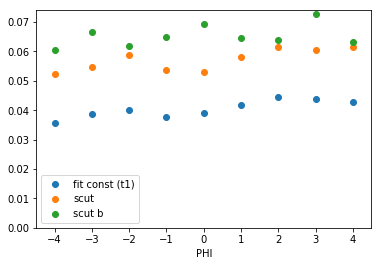

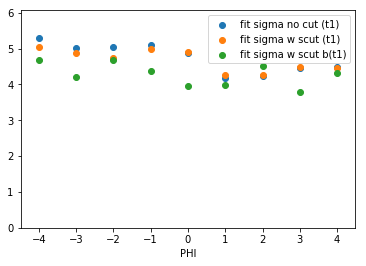

In [12]:


##################################################
##                scinti_cut ana                ##
##################################################



plt.scatter(VAR,entries_list,label="hist entries")
plt.scatter(VAR,entries_list_scut,label="scut")
plt.scatter(VAR,entries_list_scut_b,label="scut b")
#plt.plot(VAR,entries_list_scut,label="hist entries")
#plt.ylim(0,np.max(entries_list_scut)*1.2)
plt.legend()
plt.xlabel(varname)
plt.title("quasi efficiency")
plt.show()

plt.scatter(VAR,mean_list,label="fit mean (t1)")
plt.scatter(VAR,mean_list_scut,label="scut")
plt.scatter(VAR,mean_list_scut_b,label="scut b")
#plt.plot(VAR,mean_list_scut,label="fit mean (t1)")
#plt.ylim(0,np.max(mean_list_scut)*1.2)
plt.legend()
plt.xlabel(varname)
plt.ylim(0,75)
plt.show()

plt.scatter(VAR,const_list,label="fit const (t1)")
plt.scatter(VAR,const_list_scut,label="scut")
plt.scatter(VAR,const_list_scut_b,label="scut b")
#plt.plot(VAR,const_list_scut,label="fit const (t1)")
plt.ylim(0,np.max(const_list_scut)*1.2)
plt.legend()
plt.xlabel(varname)
#plt.ylim(0,0.3)
plt.show()

plt.scatter(VAR,sigma_list,label="fit sigma no cut (t1)")
plt.scatter(VAR,sigma_list_scut,label="fit sigma w scut (t1)")
plt.scatter(VAR,sigma_list_scut_b,label="fit sigma w scut b(t1)")

#plt.plot(VAR,sigma_list_scut,label="fit sigma (t1)")
plt.ylim(0,np.max(sigma_list_scut)*1.2)
#plt.ylim(0,20)
plt.legend()
plt.xlabel(varname)
plt.show()

#area_list_scut = np.array(const_list_scut) * np.array(sigma_list_scut)

#plt.scatter(VAR,area_list_scut,label="gaus area")
#plt.ylim(0,np.max(area_list_scut))
#plt.legend()
#plt.ylim(0,5)
#plt.show()

saving to /workdir/jupyter/offline_quick_ana_combi_data/004.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/004.pickle


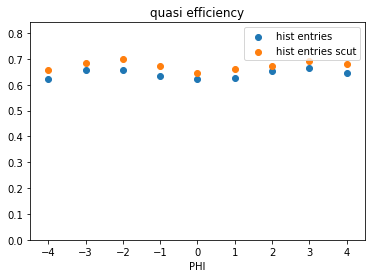

saving to /workdir/jupyter/offline_quick_ana_combi_data/005.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/005.pickle


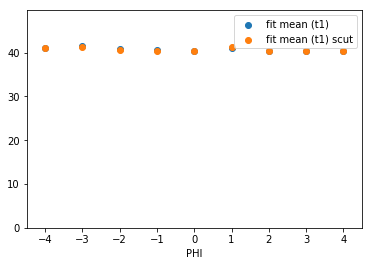

saving to /workdir/jupyter/offline_quick_ana_combi_data/006.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/006.pickle


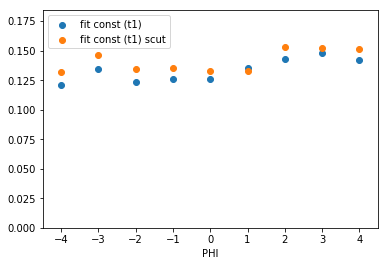

saving to /workdir/jupyter/offline_quick_ana_combi_data/007.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/007.pickle


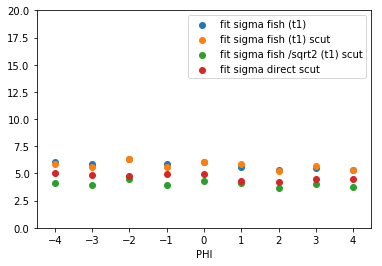

In [13]:
##################################################
##               scut    fish ana                   ##
##################################################


plt.scatter(VAR,fish_entries_list,label="hist entries")
plt.scatter(VAR,fish_entries_list_scut,label="hist entries scut")
#plt.plot(VAR,fish_entries_list_scut,label="hist entries")
plt.ylim(0,np.max(fish_entries_list_scut)*1.2)
plt.legend()
plt.title("quasi efficiency")
plt.xlabel(varname)
show(plt)

plt.scatter(VAR,fish_mean_list,label="fit mean (t1)")
plt.scatter(VAR,fish_mean_list_scut,label="fit mean (t1) scut")
#plt.plot(VAR,fish_mean_list_scut,label="fit mean (t1)")
plt.ylim(0,np.max(fish_mean_list_scut)*1.2)
plt.legend()
#plt.ylim(0,75)
plt.xlabel(varname)
show(plt)

plt.scatter(VAR,fish_const_list,label="fit const (t1)")
plt.scatter(VAR,fish_const_list_scut,label="fit const (t1) scut")
#plt.plot(VAR,fish_const_list_scut,label="fit const (t1)")
plt.ylim(0,np.max(fish_const_list_scut)*1.2)
plt.legend()
#plt.ylim(0,0.3)
plt.xlabel(varname)
show(plt)

plt.scatter(VAR,fish_sigma_list,label="fit sigma fish (t1)")
plt.scatter(VAR,fish_sigma_list_scut,label="fit sigma fish (t1) scut")
plt.scatter(VAR,np.array(fish_sigma_list_scut)/np.sqrt(2),label="fit sigma fish /sqrt2 (t1) scut")
plt.scatter(VAR,sigma_list_scut,label="fit sigma direct scut")
#plt.plot(VAR,fish_sigma_list_scut,label="fit sigma (t1)")
plt.ylim(0,np.max(fish_sigma_list_scut)*1.2)
plt.ylim(0,20)
plt.legend()
plt.xlabel(varname)
show(plt)


In [14]:
#archive(label="{:s}_{:s}_{:s}".format(id,root_file_name,varname))